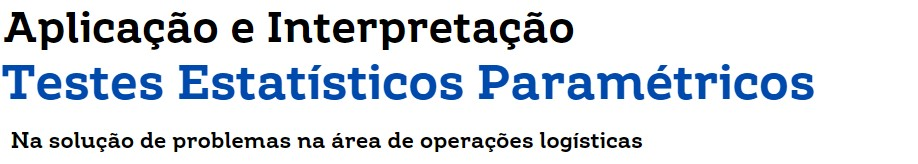

In [1]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Imports para modelagem estatística
import pylab
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.regression.linear_model as smf
import statsmodels.stats.api as sms
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip

# Import para divisão dos dados
import sklearn
from sklearn.model_selection import train_test_split

# Import para padronização dos dados
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Marcus Lopes"

Author: Marcus Lopes



## Problema de Negócio:

### Identificação dos fatores que afetam o percentual de entregas no prazo de uma transportadora


**Contexto:**

No setor logístico, a métrica do percentual de entregas no prazo é essencial para medir a eficiência e a eficácia das operações de entrega. Este indicador reflete a capacidade da empresa em cumprir os prazos prometidos aos clientes. Compreender as **variáveis** que afetam esse percentual é crucial para aprimorar processos e implementar melhorias que podem aumentar a pontualidade das entregas.

**Objetivo:** O objetivo principal deste projeto é identificar quais variaveis têm uma maior influência sobre o percentual de entregas no prazo **(percentual_entregas_no_prazo)** que será a variavel alvo. 
<br>

Identificar essas variáveis permitirá a formulação de estratégias direcionadas para otimizar processos e operações, resultando em uma maior taxa de entregas efetuadas dentro dos prazos pela transportadora.

**Será usado uma series de Testes Estatísticos para analisar o fatores que afetam o Percentual de Entregas no Prazo.**

## Carregando os Dados e Definindo a Variável Alvo

In [3]:
# Dataset com os dados de entregas da transportadora

dfd = pd.read_csv("C:\Arquivos\dataset_logistica_corrigido.csv",encoding = "ISO-8859-1")

In [4]:
# Configurando o dataset para mostrar números com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# Mostrar a quantidade de linhas e colunas
dfd.shape

(500, 15)

In [6]:
# Verificar as primeiras linhas do dataframe
dfd.head() 

,tempo_medio_entrega,numero_medio_paradas,distancia_media_percorrida,numero_medio_entregas_dia,tempo_medio_carregamento,percentual_falhas_entrega,satisfacao_cliente,tempo_medio_descarga,percentual_rotas_otimizadas,numero_veiculos_operacao,percentual_veiculos_utilizados,custo_medio_combustivel,numero_medio_ocorrencias_transito,percentual_entregas_danos,percentual_entregas_no_prazo
0,1.75,3,14.68,18,0.46,62.28,99.31,0.59,97.89,2,16.22,3.59,1,33.05,62.97
1,2.90,2,47.59,16,0.90,100.00,98.66,1.11,98.40,1,14.44,3.04,4,69.31,24.81
2,2.46,2,35.11,10,0.82,100.00,99.09,1.05,98.54,1,8.85,2.10,3,43.44,31.66
3,2.20,2,23.40,13,0.59,100.00,98.98,0.67,98.67,1,11.69,2.50,2,32.91,40.71
4,1.31,2,15.57,13,0.42,77.19,99.25,0.54,98.63,1,11.75,2.49,1,28.11,54.62


O percentual de entregas no prazo **(variável percentual_entregas_no_prazo)** é a **variável alvo** e o restante são as **variáveis independentes**.

Verificando quais variáveis preditoras devem ser usadas.

In [7]:
# criar uma cópia dos dados (precisaremos dessa cópia mais tarde)
dfd2 = dfd.copy()

## Análise Exploratória

In [8]:
dfd2.shape

(500, 15)

In [9]:
dfd2.dtypes

tempo_medio_entrega                  float64
numero_medio_paradas                   int64
distancia_media_percorrida           float64
numero_medio_entregas_dia              int64
tempo_medio_carregamento             float64
percentual_falhas_entrega            float64
satisfacao_cliente                   float64
tempo_medio_descarga                 float64
percentual_rotas_otimizadas          float64
numero_veiculos_operacao               int64
percentual_veiculos_utilizados       float64
custo_medio_combustivel              float64
numero_medio_ocorrencias_transito      int64
percentual_entregas_danos            float64
percentual_entregas_no_prazo         float64
dtype: object

In [10]:
dfd2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   tempo_medio_entrega                500 non-null    float64
 1   numero_medio_paradas               500 non-null    int64  
 2   distancia_media_percorrida         500 non-null    float64
 3   numero_medio_entregas_dia          500 non-null    int64  
 4   tempo_medio_carregamento           500 non-null    float64
 5   percentual_falhas_entrega          500 non-null    float64
 6   satisfacao_cliente                 500 non-null    float64
 7   tempo_medio_descarga               500 non-null    float64
 8   percentual_rotas_otimizadas        500 non-null    float64
 9   numero_veiculos_operacao           500 non-null    int64  
 10  percentual_veiculos_utilizados     500 non-null    float64
 11  custo_medio_combustivel            500 non-null    float64

Análise:

* Há um total de **500 observações** não nulas em cada uma das colunas. **Isso indica que não há valores ausentes nos dados.**

* Cada coluna neste conjunto de dados é de natureza numérica.

In [11]:
# Resumo estatístico
dfd2.describe()

,tempo_medio_entrega,numero_medio_paradas,distancia_media_percorrida,numero_medio_entregas_dia,tempo_medio_carregamento,percentual_falhas_entrega,satisfacao_cliente,tempo_medio_descarga,percentual_rotas_otimizadas,numero_veiculos_operacao,percentual_veiculos_utilizados,custo_medio_combustivel,numero_medio_ocorrencias_transito,percentual_entregas_danos,percentual_entregas_no_prazo
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,2.00,2.47,30.32,14.54,0.60,87.00,99.21,0.80,98.27,1.47,13.08,2.91,2.53,44.15,42.18
std,0.60,0.50,11.83,2.89,0.21,17.70,0.26,0.25,0.36,0.50,2.60,0.59,1.20,13.08,11.73
min,1.01,2.00,10.19,10.00,0.12,34.13,98.65,0.21,97.66,1.00,8.77,1.80,0.00,8.46,15.08
25%,1.48,2.00,19.48,12.00,0.44,74.59,99.00,0.59,97.91,1.00,10.81,2.36,1.00,35.54,33.38
50%,2.03,2.00,31.09,15.00,0.60,100.00,99.20,0.80,98.43,1.00,13.36,2.92,3.00,45.35,39.77
75%,2.51,3.00,40.75,17.00,0.76,100.00,99.41,1.01,98.60,2.00,15.28,3.39,4.00,53.51,49.54
max,2.99,3.00,49.92,19.00,1.13,100.00,99.85,1.36,98.88,2.00,17.29,3.99,5.00,85.99,74.29


Análise:

- Existe uma média de tempo de entrega de 02 horas (variável **tempo_medio_entrega**).
<br>

- Há uma variação muito grande na variável **percentual_entregas_danos**, pois observamos que o valor mínimo corresponde à 8.46, enquanto o valor máximo corresponde a 85,99. Provavelmente são valores discrepantes, pois são muito diferentes da mediana e até 75% do quartil.
<br>

- **Antes de realizar a modelagem, é importante verificar a distribuição das variáveis e interpretá-las.**

In [12]:
# verificando a SKewness das variaveis
dfd2.skew(axis = 0)

tempo_medio_entrega                 -0.03
numero_medio_paradas                 0.10
distancia_media_percorrida          -0.05
numero_medio_entregas_dia           -0.03
tempo_medio_carregamento             0.02
percentual_falhas_entrega           -1.10
satisfacao_cliente                   0.08
tempo_medio_descarga                 0.01
percentual_rotas_otimizadas         -0.08
numero_veiculos_operacao             0.10
percentual_veiculos_utilizados      -0.03
custo_medio_combustivel             -0.00
numero_medio_ocorrencias_transito   -0.06
percentual_entregas_danos           -0.25
percentual_entregas_no_prazo         0.63
dtype: float64

**Análise:** 

- A variável dependente (percentual_entregas_no_prazo) apresenta uma assimetria à direita, com um valor de **skew de 0,63, indicando uma distorção moderada.**

* A - Um valor de assimetria maior que 1 indica uma distribuição altamente distorcida.
* B - Um valor de assimetria menor que -1 indica uma distribuição altamente distorcida.
* C - Um valor entre 0,5 e 1 indica uma distorção moderada.
* D - Um valor entre -0,5 e -1 indica uma distorção moderada.
* E - Um valor entre -0,5 e 0,5 indica que a distribuição é bastante simétrica.


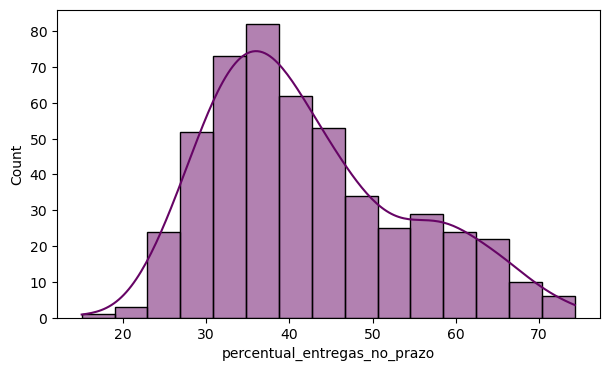

In [13]:
# Plot do histograma
plt.figure(figsize = (7, 4))
sns.histplot(data = dfd2, x = dfd2.percentual_entregas_no_prazo, kde = True, color = '#660465')
plt.show()

Como a variável dependente está moderadamente distorcida para a direita, será aplicada uma transformação logarítmica na coluna percentual_entregas_no_prazo e verificaremos a distribuição da coluna transformada. Por quê? Para evitar distorções nos dados causadas por valores discrepantes. O objetivo dessa transformação é analisar e compreender o padrão nos dados.


In [14]:
# Transformação de log
dfd2['percentual_entregas_no_prazo_log'] = np.log(dfd2['percentual_entregas_no_prazo'])

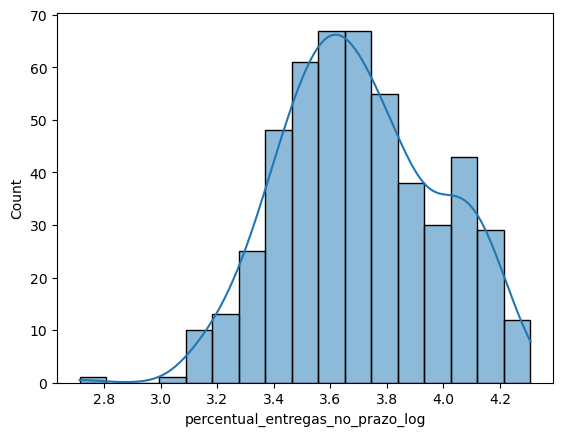

In [15]:
sns.histplot(data = dfd2, x = 'percentual_entregas_no_prazo_log', kde = True);

In [16]:
dfd2.skew(axis = 0)

tempo_medio_entrega                 -0.03
numero_medio_paradas                 0.10
distancia_media_percorrida          -0.05
numero_medio_entregas_dia           -0.03
tempo_medio_carregamento             0.02
percentual_falhas_entrega           -1.10
satisfacao_cliente                   0.08
tempo_medio_descarga                 0.01
percentual_rotas_otimizadas         -0.08
numero_veiculos_operacao             0.10
percentual_veiculos_utilizados      -0.03
custo_medio_combustivel             -0.00
numero_medio_ocorrencias_transito   -0.06
percentual_entregas_danos           -0.25
percentual_entregas_no_prazo         0.63
percentual_entregas_no_prazo_log     0.07
dtype: float64

In [17]:
dfd2.head()

,tempo_medio_entrega,numero_medio_paradas,distancia_media_percorrida,numero_medio_entregas_dia,tempo_medio_carregamento,percentual_falhas_entrega,satisfacao_cliente,tempo_medio_descarga,percentual_rotas_otimizadas,numero_veiculos_operacao,percentual_veiculos_utilizados,custo_medio_combustivel,numero_medio_ocorrencias_transito,percentual_entregas_danos,percentual_entregas_no_prazo,percentual_entregas_no_prazo_log
0,1.75,3,14.68,18,0.46,62.28,99.31,0.59,97.89,2,16.22,3.59,1,33.05,62.97,4.14
1,2.90,2,47.59,16,0.90,100.00,98.66,1.11,98.40,1,14.44,3.04,4,69.31,24.81,3.21
2,2.46,2,35.11,10,0.82,100.00,99.09,1.05,98.54,1,8.85,2.10,3,43.44,31.66,3.46
3,2.20,2,23.40,13,0.59,100.00,98.98,0.67,98.67,1,11.69,2.50,2,32.91,40.71,3.71
4,1.31,2,15.57,13,0.42,77.19,99.25,0.54,98.63,1,11.75,2.49,1,28.11,54.62,4.00


Análise:

* A distorção foi reduzida. Agora, a variável dependente apresenta uma distribuição bastante simétrica.

* A variável log-transformada (percentual_entregas_no_prazo_log) parece ter uma distribuição quase normal, sem distorção. Portanto, podemos prosseguir com a análise.

## Análise Bivariada

Para verificar a correlação, foi utilizado um mapa de calor. A correlação é um coeficiente que indica a relação entre as variáveis e pode assumir valores de -1 a +1, sendo:

* O valor de -1 indica forte correlação negativa.
* O valor de +1 indica forte correlação positiva.
* O valor de zero indica que não há correlação.

Notas: O objetivo é ter uma alta correlação das variáveis preditoras com a variável alvo e uma baixa correlação entre as variáveis preditoras. Alta correlação entre as variáveis preditoras (positiva ou negativa) indica um problema de multicolinearidade, que precisa ser resolvido.

In [18]:
# Matriz de correlação
dfd2.corr()

,tempo_medio_entrega,numero_medio_paradas,distancia_media_percorrida,numero_medio_entregas_dia,tempo_medio_carregamento,percentual_falhas_entrega,satisfacao_cliente,tempo_medio_descarga,percentual_rotas_otimizadas,numero_veiculos_operacao,percentual_veiculos_utilizados,custo_medio_combustivel,numero_medio_ocorrencias_transito,percentual_entregas_danos,percentual_entregas_no_prazo,percentual_entregas_no_prazo_log
tempo_medio_entrega,1.00,-0.00,0.07,-0.00,0.88,0.84,-0.91,0.92,-0.01,-0.00,0.00,0.01,0.06,0.56,-0.77,-0.75
numero_medio_paradas,-0.00,1.00,-0.04,0.01,0.02,0.02,-0.02,-0.00,-0.96,1.00,0.01,0.01,-0.04,0.00,-0.02,-0.02
distancia_media_percorrida,0.07,-0.04,1.00,0.02,0.05,0.02,-0.06,0.09,0.05,-0.04,0.02,0.04,0.97,0.06,-0.35,-0.39
numero_medio_entregas_dia,-0.00,0.01,0.02,1.00,0.01,-0.02,0.00,-0.00,-0.00,0.01,1.00,0.98,0.03,-0.03,0.24,0.26
tempo_medio_carregamento,0.88,0.02,0.05,0.01,1.00,0.72,-0.80,0.81,-0.03,0.02,0.01,0.02,0.05,0.48,-0.66,-0.65
percentual_falhas_entrega,0.84,0.02,0.02,-0.02,0.72,1.00,-0.78,0.78,-0.03,0.02,-0.02,-0.01,0.02,0.67,-0.88,-0.83
satisfacao_cliente,-0.91,-0.02,-0.06,0.00,-0.80,-0.78,1.00,-0.84,0.03,-0.02,-0.00,-0.01,-0.05,-0.50,0.71,0.69
tempo_medio_descarga,0.92,-0.00,0.09,-0.00,0.81,0.78,-0.84,1.00,-0.00,-0.00,0.00,0.01,0.08,0.52,-0.72,-0.70
percentual_rotas_otimizadas,-0.01,-0.96,0.05,-0.00,-0.03,-0.03,0.03,-0.00,1.00,-0.96,-0.00,0.00,0.05,-0.01,0.03,0.03
numero_veiculos_operacao,-0.00,1.00,-0.04,0.01,0.02,0.02,-0.02,-0.00,-0.96,1.00,0.01,0.01,-0.04,0.00,-0.02,-0.02


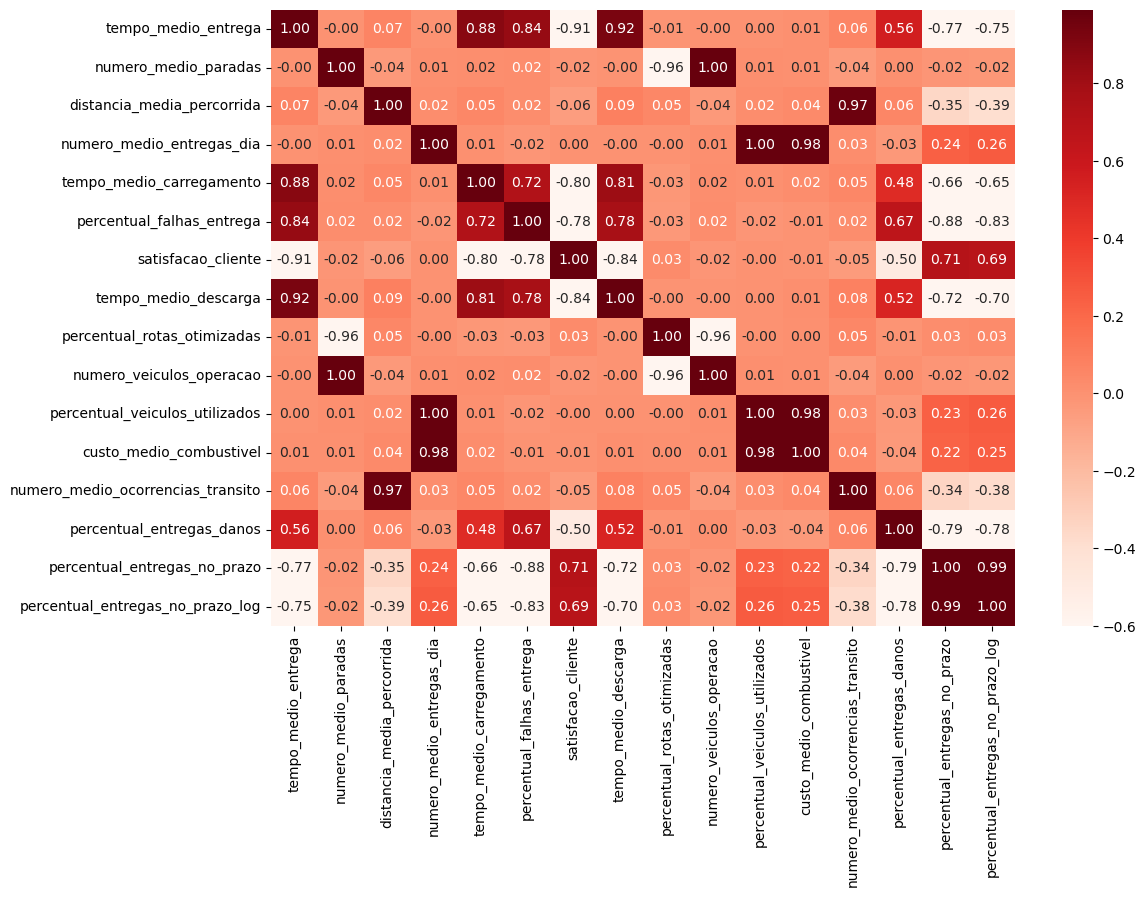

In [19]:
# Tamanho da figura
plt.figure(figsize = (12,8))

# Mapa de calor
# Estamos realçando os valores de correlação entre 0.59 e 0.99, positivo ou negativo.
sns.heatmap(dfd2.corr(), annot = True, fmt = '.2f', cmap = 'Reds', vmax = .99, vmin = -0.60)
plt.show()

Análise:

Temos uma correlação significativa entre as variáveis:

* (01). tempo_medio_carregamento  e tempo_medio_entrega: A Correlação entre as variáveis é: 0.87
* (02). percentual_falhas_entrega e tempo_medio_entrega: A Correlação entre as variáveis é: 0.83
* (03). satisfacao_cliente  e tempo_medio_entrega: A Correlação entre as variáveis é: -0.91
* (04). tempo_medio_descarga e tempo_medio_entrega : A Correlação entre as variáveis é: 0.92
* (05). percentual_rotas_otimizadas e numero_medio_paradas: A Correlação entre as variáveis é: -0.96
* (06). numero_veiculos_operacao e numero_medio_paradas: A Correlação entre as variáveis é: 1.0
* (07). percentual_veiculos_utilizados e  numero_medio_entregas_dia:A Correlação entre as variáveis é: 0.99
* (08). custo_medio_combustivel e numero_medio_entregas_dia: A Correlação entre as variáveis é: 0.98
* (09). numero_medio_ocorrencias_transito e  distancia_media_percorrida: A Correlação entre as variáveis é: 0.96
* (10). percentual_entregas_danos e percentual_falhas_entrega: A Correlação entre as variáveis é: 0.66

Analisando as altas correlações

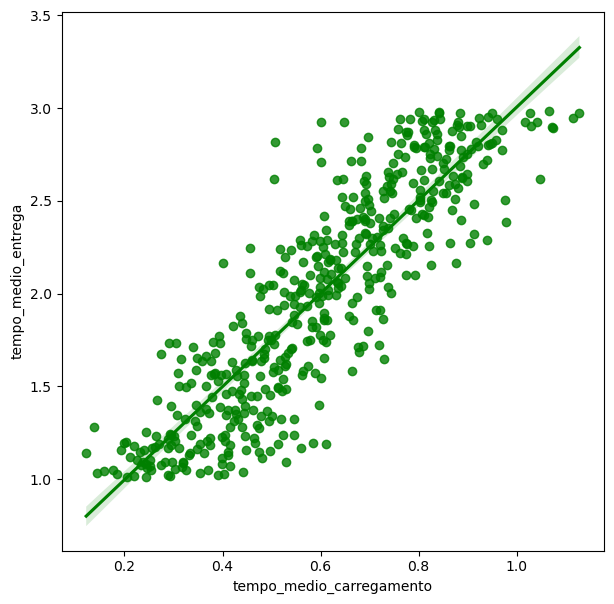

In [20]:
# Scatter Plot 01
plt.figure(figsize = (7, 7))
sns.regplot(x = 'tempo_medio_carregamento', y = 'tempo_medio_entrega', data = dfd2, color = 'green') 
plt.show()

In [21]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dfd2['tempo_medio_carregamento'], 
                                                     dfd2['tempo_medio_entrega'])[0])

A Correlação entre as variáveis é: 0.8790692842976165


Análise:

* **Correlação Positiva:** O tempo médio de entrega dos pedidos aumenta à medida que o tempo médio de carregamento dos pedidos também aumenta.

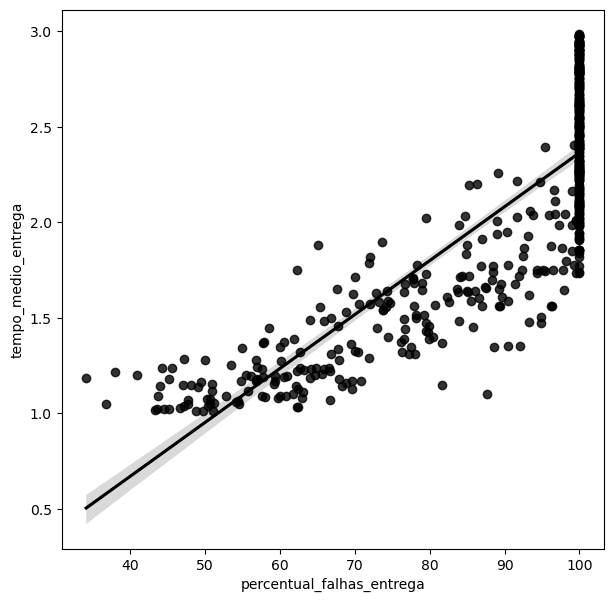

In [22]:
# Scatter Plot 02
plt.figure(figsize = (7, 7))
sns.regplot(x = 'percentual_falhas_entrega', y = 'tempo_medio_entrega', data = dfd2, color = 'black') 
plt.show()

In [23]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dfd2['percentual_falhas_entrega'], 
                                                     dfd2['tempo_medio_entrega'])[0])

A Correlação entre as variáveis é: 0.8366445993242119


Análise:

* **Correlação Positiva:** O tempo médio de entrega dos pedidos aumenta à medida que aumenta o percentual de falhas nas entregas.

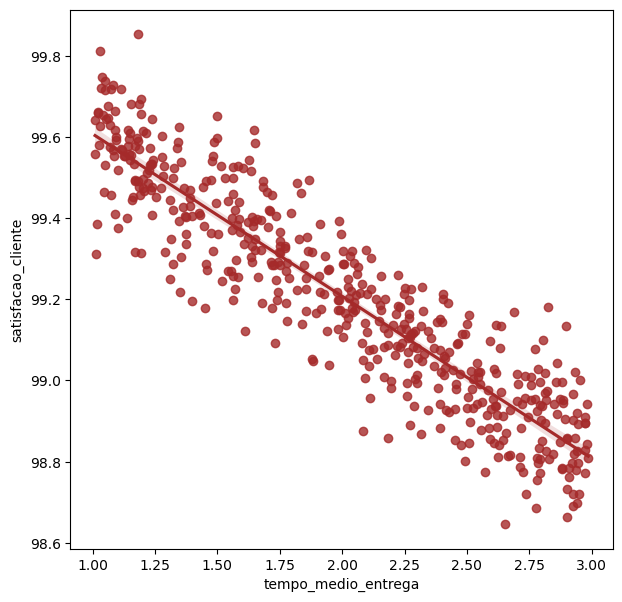

In [24]:
# Scatter Plot 03
plt.figure(figsize = (7, 7))
sns.regplot(x = 'tempo_medio_entrega', y = 'satisfacao_cliente', data = dfd2, color = 'brown') 
plt.show()

In [25]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dfd2['tempo_medio_entrega'], 
                                                     dfd2['satisfacao_cliente'])[0])

A Correlação entre as variáveis é: -0.9146287074554488


Análise:

* **Correlação Negativa:** A satisfação do cliente diminui à medida que aumenta o tempo médio de entrega dos pedidos.

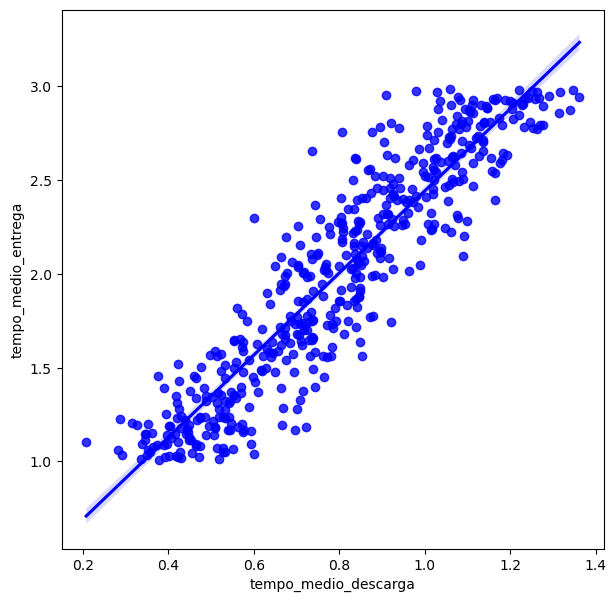

In [26]:
# Scatter Plot 04
plt.figure(figsize = (7, 7))
sns.regplot(x = 'tempo_medio_descarga', y = 'tempo_medio_entrega', data = dfd2, color = 'blue') 
plt.show()

In [27]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dfd2['tempo_medio_descarga'], 
                                                     dfd2['tempo_medio_entrega'])[0])

A Correlação entre as variáveis é: 0.9227037307931027


Análise:

* **Correlação positiva:** À medida que a equipe aumenta o tempo de descarga dos pedidos, o tempo de entrega dos pedidos também aumenta.

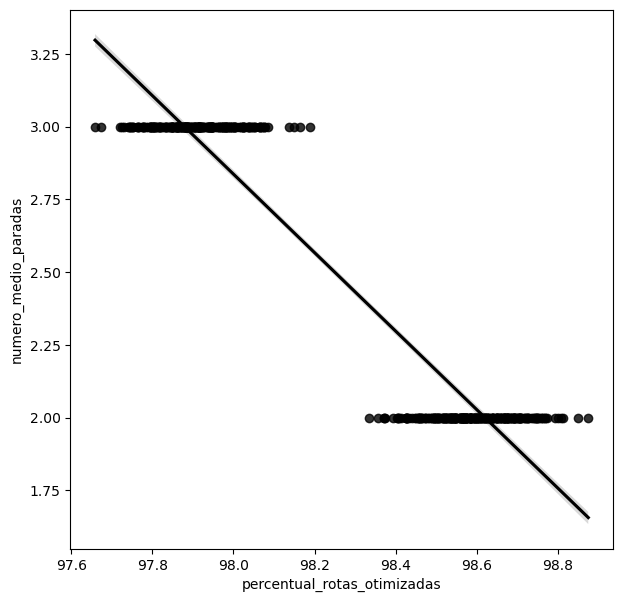

In [28]:
# Scatter Plot 05
plt.figure(figsize=(7, 7))
sns.regplot(
    x='percentual_rotas_otimizadas', 
    y='numero_medio_paradas',
    data=dfd2, 
    color='black'
)
plt.show()


In [29]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dfd2['percentual_rotas_otimizadas'], 
                                                     dfd2['numero_medio_paradas'])[0])

A Correlação entre as variáveis é: -0.9622797392506504


Análise:

* **Correlação Negativa:** À medida que aumenta o percentual de rotas de entrega otimizadas, o número de paradas nas entregas diminui.

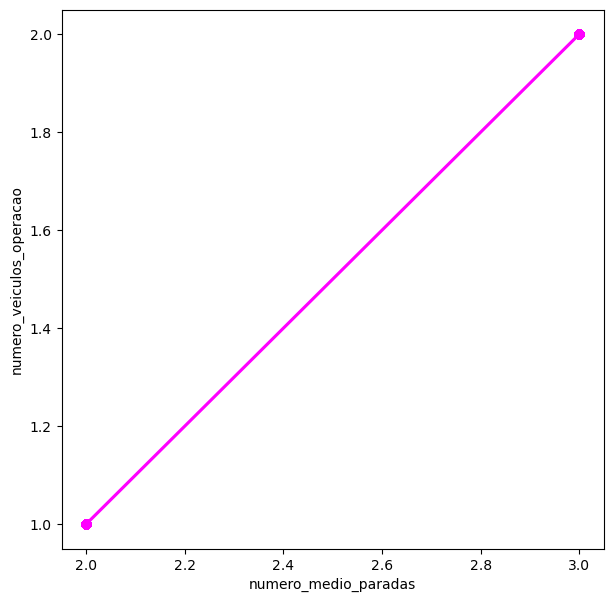

In [30]:
# Scatter Plot 06
plt.figure(figsize = (7, 7))
sns.regplot(
    x = 'numero_medio_paradas',
    y = 'numero_veiculos_operacao', 
    data = dfd2, color = 'magenta')
plt.show()

In [31]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dfd2['numero_veiculos_operacao'], 
                                                     dfd2['numero_medio_paradas'])[0])

A Correlação entre as variáveis é: 1.0


Análise:

* **Correlação Positiva:** À medida que aumenta o número de paradas de veículos, cresce o número de veículos em operação para cobrir os veículos parados.

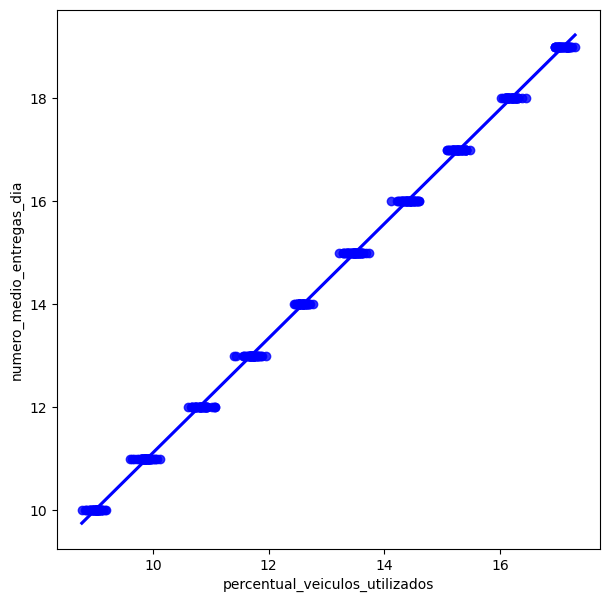

In [32]:
# Scatter Plot 07
plt.figure(figsize = (7, 7))
sns.regplot(
    x = 'percentual_veiculos_utilizados', 
    y = 'numero_medio_entregas_dia', 
    data = dfd2, color = 'blue') 
plt.show()

In [33]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dfd2['percentual_veiculos_utilizados'], 
                                                     dfd2['numero_medio_entregas_dia'])[0])

A Correlação entre as variáveis é: 0.9993178124252656


Análise:

* **Correlação Positiva:** À medida que aumenta o percentual de veículos utilizados, também aumenta o número de entregas de pedidos realizadas no dia.

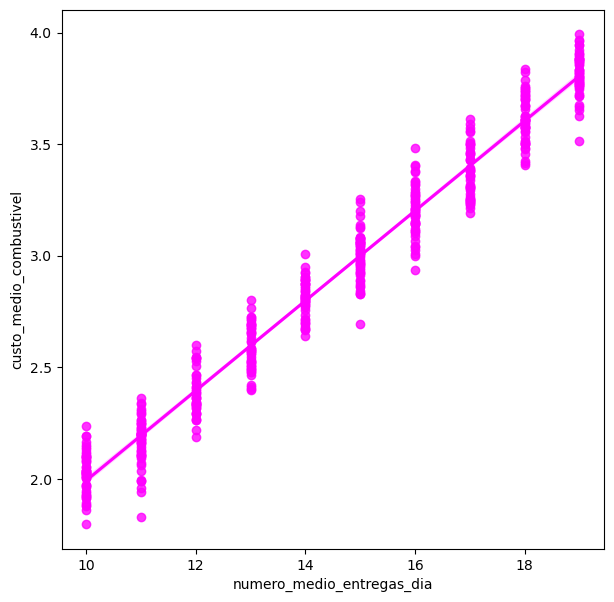

In [34]:
# Scatter Plot 08
plt.figure(figsize = (7, 7))
sns.regplot(
    x = 'numero_medio_entregas_dia', 
    y = 'custo_medio_combustivel',
    data = dfd2, color = 'magenta') 
plt.show()

In [35]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dfd2['custo_medio_combustivel'], 
                                                     dfd2['numero_medio_entregas_dia'])[0])

A Correlação entre as variáveis é: 0.9844594949854623


Análise:

**Correlação Positiva:** À medida que aumenta o número de entregas diárias, existe um aumento no custo do combustível, devido ao aumento do consumo.

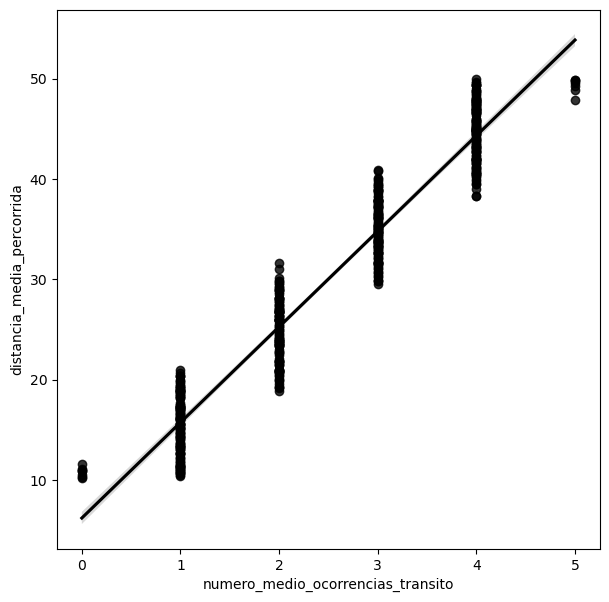

In [36]:
# Scatter Plot 09
plt.figure(figsize = (7, 7))
sns.regplot(
    x = 'numero_medio_ocorrencias_transito', 
    y = 'distancia_media_percorrida', data = dfd2, color = 'black') 
plt.show()

In [37]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dfd2['numero_medio_ocorrencias_transito'], 
                                                     dfd2['distancia_media_percorrida'])[0])

A Correlação entre as variáveis é: 0.9676003276806725


Análise:

* **Correlação Positiva:** À medida que aumenta o número de ocorrências no trânsito, aumenta a distância percorrida.

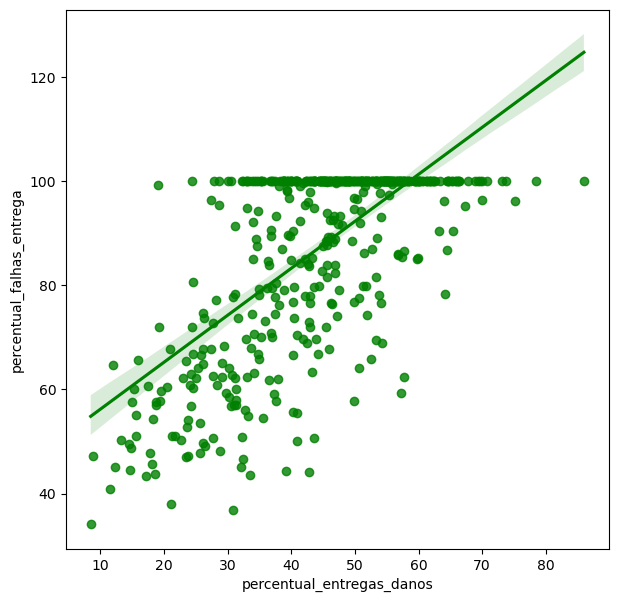

In [38]:
# Scatter Plot10
plt.figure(figsize = (7, 7))
sns.regplot(
    x = 'percentual_entregas_danos', 
    y = 'percentual_falhas_entrega', data = dfd2, color = 'green') 
plt.show()

In [39]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dfd2['percentual_entregas_danos'], 
                                                     dfd2['percentual_falhas_entrega'])[0])

A Correlação entre as variáveis é: 0.6662430338442636


Análise:

* **Correlação Positiva:** À medida que aumenta o percentual de entregas de pedidos com danos, aumenta o percentual de falhas nas entregas de pedidos.

## Detectando Outliers

In [40]:
# criar uma cópia dos dados (precisaremos dessa cópia mais tarde)
dfd3 = dfd2.copy()

In [41]:
# Identificação de outliers através do método do IQR (Interquartile Range)
Q1 = dfd3.quantile(0.25)
Q3 = dfd3.quantile(0.75)
IQR = Q3 - Q1

In [42]:
# Definir outliers como aqueles valores que estão fora do intervalo [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
outliers = ((dfd3 < (Q1 - 1.5 * IQR)) | (dfd3 > (Q3 + 1.5 * IQR))).sum()

In [43]:
# Total de outliers
outliers

tempo_medio_entrega                  0
numero_medio_paradas                 0
distancia_media_percorrida           0
numero_medio_entregas_dia            0
tempo_medio_carregamento             0
percentual_falhas_entrega            1
satisfacao_cliente                   0
tempo_medio_descarga                 0
percentual_rotas_otimizadas          0
numero_veiculos_operacao             0
percentual_veiculos_utilizados       0
custo_medio_combustivel              0
numero_medio_ocorrencias_transito    0
percentual_entregas_danos            2
percentual_entregas_no_prazo         2
percentual_entregas_no_prazo_log     1
dtype: int64

In [44]:
# Cria um resumo com os outliers
outliers_summary = pd.DataFrame({'Outliers': outliers, 'Percentual': (outliers / len(dfd3)) * 100})

In [45]:
# Retorna os resultados quando o valor for maior do que zero
outliers_summary[outliers_summary['Outliers'] > 0]

,Outliers,Percentual
percentual_falhas_entrega,1,0.20
percentual_entregas_danos,2,0.40
percentual_entregas_no_prazo,2,0.40
percentual_entregas_no_prazo_log,1,0.20


## Análise Estatística Para Tratamento de Outliers

In [46]:
# Definindo os limites para filtrar os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [47]:
# Filtrando os outliers
novo_df = dfd3[~((dfd3 < limite_inferior) | (dfd3 > limite_superior)).any(axis=1)]

In [48]:
# Shape
novo_df.shape

(497, 16)

In [49]:
# Resumo estatístico
novo_df.describe()

,tempo_medio_entrega,numero_medio_paradas,distancia_media_percorrida,numero_medio_entregas_dia,tempo_medio_carregamento,percentual_falhas_entrega,satisfacao_cliente,tempo_medio_descarga,percentual_rotas_otimizadas,numero_veiculos_operacao,percentual_veiculos_utilizados,custo_medio_combustivel,numero_medio_ocorrencias_transito,percentual_entregas_danos,percentual_entregas_no_prazo,percentual_entregas_no_prazo_log
count,497.00,497.00,497.00,497.00,497.00,497.00,497.00,497.00,497.00,497.00,497.00,497.00,497.00,497.00,497.00,497.00
mean,2.00,2.47,30.28,14.53,0.60,87.16,99.21,0.80,98.27,1.47,13.07,2.90,2.53,44.19,42.10,3.70
std,0.60,0.50,11.84,2.88,0.21,17.47,0.26,0.25,0.36,0.50,2.59,0.59,1.20,12.83,11.52,0.27
min,1.01,2.00,10.19,10.00,0.12,36.76,98.65,0.21,97.66,1.00,8.77,1.80,0.00,8.78,21.60,3.07
25%,1.48,2.00,19.34,12.00,0.44,76.12,99.00,0.59,97.91,1.00,10.81,2.36,1.00,35.90,33.38,3.51
50%,2.03,2.00,31.03,15.00,0.60,100.00,99.20,0.80,98.43,1.00,13.35,2.91,3.00,45.42,39.77,3.68
75%,2.51,3.00,40.73,17.00,0.76,100.00,99.41,1.01,98.60,2.00,15.27,3.38,4.00,53.50,49.42,3.90
max,2.99,3.00,49.92,19.00,1.13,100.00,99.85,1.36,98.88,2.00,17.29,3.99,5.00,78.51,72.19,4.28


In [50]:
# Definir outliers como aqueles valores que estão fora do intervalo [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
outliers = ((novo_df < (Q1 - 1.5 * IQR)) | (novo_df > (Q3 + 1.5 * IQR))).sum()

In [51]:
# verificando novamente o Total de outliers
outliers

tempo_medio_entrega                  0
numero_medio_paradas                 0
distancia_media_percorrida           0
numero_medio_entregas_dia            0
tempo_medio_carregamento             0
percentual_falhas_entrega            0
satisfacao_cliente                   0
tempo_medio_descarga                 0
percentual_rotas_otimizadas          0
numero_veiculos_operacao             0
percentual_veiculos_utilizados       0
custo_medio_combustivel              0
numero_medio_ocorrencias_transito    0
percentual_entregas_danos            0
percentual_entregas_no_prazo         0
percentual_entregas_no_prazo_log     0
dtype: int64

### Conclusão da Análise Exploratória

> Há correlações significativas entre algumas variáveis independentes, o que pode prejudicar a regressão linear. Os dados terão que ser analisados para decidir como resolver essas correlações e melhorar o modelo. 

## Preparação dos Dados

Os dados serão divididos em variáveis X e Y, e em conjuntos de treino e teste, com uma proporção de 80/20.

In [52]:
# Separando as variáveis
Y = novo_df['percentual_entregas_no_prazo_log']
X = novo_df.drop(columns = {'percentual_entregas_no_prazo', 'percentual_entregas_no_prazo_log'})

In [53]:
# Divide os dados
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.20 , random_state = 1)

In [54]:
X_treino.shape

(397, 14)

In [55]:
X_teste.shape

(100, 14)

In [56]:
y_treino.shape

(397,)

In [57]:
y_teste.shape

(100,)

## Modelagem Estatística - Primeira Versão do Modelo

Usaremos os dados de entrada no seu estado bruto original. sem a padronização a nível de verificar o efeito dessa falta de padronização

In [58]:
# Adiciona a constante (intercepto)
# Isso é requerido pelo Statsmodels
X_treino_const_1 = sm.add_constant(X_treino)

In [59]:
type(X_treino_const_1)

pandas.core.frame.DataFrame

In [60]:
X_treino_const_1.shape

(397, 15)

In [61]:
type(y_treino)

pandas.core.series.Series

In [62]:
y_treino.shape

(397,)

In [63]:
# Cria o modelo
modelo_v1 = sm.OLS(y_treino, X_treino_const_1).fit()

In [64]:
# Sumário do modelo
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     percentual_entregas_no_prazo_log   R-squared:                       0.981
Model:                                          OLS   Adj. R-squared:                  0.980
Method:                               Least Squares   F-statistic:                     1527.
Date:                              Tue, 23 Jul 2024   Prob (F-statistic):          1.42e-320
Time:                                      11:47:29   Log-Likelihood:                 749.46
No. Observations:                               397   AIC:                            -1471.
Df Residuals:                                   383   BIC:                            -1415.
Df Model:                                        13                                         
Covariance Type:                          nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.3322      1.743      0.191      0.849      -3.096       3.760
tempo_medio_entrega                  -0.0312      0.014     -2.261      0.024      -0.058      -0.004
numero_medio_paradas                  0.1628      0.867      0.188      0.851      -1.542       1.867
distancia_media_percorrida           -0.0087      0.001    -13.853      0.000      -0.010      -0.007
numero_medio_entregas_dia            -0.0041      0.018     -0.230      0.818      -0.040       0.031
tempo_medio_carregamento             -0.0047      0.019     -0.245      0.807      -0.042       0.033
percentual_falhas_entrega            -0.0076      0.000    -34.311      0.000      -0.008      -0.007
satisfacao_cliente                    0.0326      0.018      1.796      0.073      -0.003       0.068
tempo_medio_descarga                 -0.0137      0.019     -0.709      0.479      -0.052       0.024
percentual_rotas_otimizadas           0.0099      0.019      0.517      0.605      -0.028       0.048
numero_veiculos_operacao             -0.1694      0.877     -0.193      0.847      -1.893       1.554
percentual_veiculos_utilizados        0.0307      0.020      1.537      0.125      -0.009       0.070
custo_medio_combustivel               0.0010      0.018      0.054      0.957      -0.035       0.037
numero_medio_ocorrencias_transito     0.0044      0.006      0.721      0.472      -0.008       0.016
percentual_entregas_danos            -0.0077      0.000    -38.653      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       47.086   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.346
Skew:                          -0.811   Prob(JB):                     3.92e-15
Kurtosis:                       4.175   Cond. No.                     1.69e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.22e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Multicolinearidade  tem que ser eliminada


Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
<br>

**[2] The smallest eigenvalue is 4.22e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.**

Estas observações são extremamente importantes. Veja que há duas notas. A primeira não é um problema em si; ela apenas nos fornece uma pista. A segunda, no entanto, é significativa. Ela indica que o número condicional é muito alto, o que pode sugerir a presença de uma forte multicolinearidade ou algum problema numérico. Esta segunda nota sugere que você precisará remover ou ajustar algo nos dados para resolver esse problema.


In [65]:
# Coeficientes aprendidos pelo modelo
modelo_v1.params

const                                0.33
tempo_medio_entrega                 -0.03
numero_medio_paradas                 0.16
distancia_media_percorrida          -0.01
numero_medio_entregas_dia           -0.00
tempo_medio_carregamento            -0.00
percentual_falhas_entrega           -0.01
satisfacao_cliente                   0.03
tempo_medio_descarga                -0.01
percentual_rotas_otimizadas          0.01
numero_veiculos_operacao            -0.17
percentual_veiculos_utilizados       0.03
custo_medio_combustivel              0.00
numero_medio_ocorrencias_transito    0.00
percentual_entregas_danos           -0.01
dtype: float64

Esses são os parâmetros e coeficientes que o modelo aprendeu. Eles demonstram a relação entre cada variável preditora e a variável alvo.

Análise:

- O modelo apresenta boa performance com valor do coeficiente R2 acima de 0.98

## Verificando a Multicolinearidade com VIF

Na Análise Bivariada fica evidente a importancia da criação da matriz de correlação. Foi observado na matriz que existe uma forte correlação entre algumas variáveis independentes (que não são as variáveis-alvo) no conjunto de dados de treino (x_treino). Foram analisadas essas correlações em pares, mas não foi tomada nenhuma ação. Assim, as variáveis permanecem no modelo. 
<br>

O modelo está indicando é que há **multicolinearidade:** algumas variáveis preditoras têm uma forte correlação com outras variáveis preditoras. Isso não pode ser mantido, pois é um problema para o modelo. Portanto, o mais indicado agora é confirmar isso utilizando a estratégia de VIF.

**O Variance Inflation Factor (VIF)** é uma medida que quantifica o quanto a variância de um estimador de regressão (coeficiente) é aumentada devido à multicolinearidade na regressão múltipla. A multicolinearidade ocorre quando há correlações altas entre duas ou mais variáveis explicativas (independentes) em um modelo de regressão, o que pode dificultar a estimação dos coeficientes da regressão com precisão.
<br>

**Variáveis com score (pontuação) VIF > 5 serão descartados/tratados até que todos os recursos tenham pontuação VIF < 5**


In [66]:
# Função para checar o VIF de todas as variáveis
def verifica_vif(train):
    
    # Cria o dataframe
    vif = pd.DataFrame()
    
    # Alimenta cada coluna
    vif["feature"] = train.columns

    # Calcula VIF para cada variável
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    
    return vif

In [67]:
type(X_treino)

pandas.core.frame.DataFrame

In [68]:
# Estamos verificando o VIF sem a constante requerida pelo Statsmodels
print(verifica_vif(X_treino))

                              feature         VIF
0                 tempo_medio_entrega       19.50
1                numero_medio_paradas 12479563.48
2          distancia_media_percorrida       15.86
3           numero_medio_entregas_dia      789.75
4            tempo_medio_carregamento        4.72
5           percentual_falhas_entrega        4.35
6                  satisfacao_cliente        6.46
7                tempo_medio_descarga        6.69
8         percentual_rotas_otimizadas       13.51
9            numero_veiculos_operacao  4801304.22
10     percentual_veiculos_utilizados      780.14
11            custo_medio_combustivel       33.40
12  numero_medio_ocorrencias_transito       15.80
13          percentual_entregas_danos        1.77


Análise:

- A maioria das variáveis apresentou o VIF muito alto. Será que a escala nos dados afetou o cálculo? Vamos ajustar isso agora.

## Padronização dos Dados

In [69]:
# Cria o padronizador
scaler = StandardScaler()

In [70]:
# Fit e transform em treino
X_treino_scaled_1 = scaler.fit_transform(X_treino)

In [71]:
X_treino_scaled_1.shape

(397, 14)

In [72]:
# Transform em teste
X_teste_scaled_1 = scaler.transform(X_teste)

In [73]:
X_teste_scaled_1.shape

(100, 14)

## Modelagem Estatística - Segunda Versão do Modelo

Aqui usaremos os dados padronizados (na mesma escala).

In [74]:
# Adiciona a constante (obrigatório para modelos criados com Statsmodels)
X_treino_const_2 = sm.add_constant(X_treino_scaled_1)

In [75]:
type(X_treino_const_2)

numpy.ndarray

In [76]:
X_treino_const_2.shape

(397, 15)

In [77]:
type(y_treino)

pandas.core.series.Series

In [78]:
y_treino.shape

(397,)

In [79]:
# Criando a segunda versão do modelo
modelo_v2 = sm.OLS(y_treino, X_treino_const_2).fit()

In [80]:
# Sumário
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     percentual_entregas_no_prazo_log   R-squared:                       0.981
Model:                                          OLS   Adj. R-squared:                  0.980
Method:                               Least Squares   F-statistic:                     1527.
Date:                              Tue, 23 Jul 2024   Prob (F-statistic):          1.42e-320
Time:                                      11:47:29   Log-Likelihood:                 749.46
No. Observations:                               397   AIC:                            -1471.
Df Residuals:                                   383   BIC:                            -1415.
Df Model:                                        13                                         
Covariance Type:                          nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7064      0.002   1979.914      0.000       3.703       3.710
x1            -0.0187      0.008     -2.261      0.024      -0.035      -0.002
x2            -0.0017      0.003     -0.480      0.631      -0.008       0.005
x3            -0.1033      0.007    -13.853      0.000      -0.118      -0.089
x4            -0.0121      0.053     -0.230      0.818      -0.116       0.091
x5            -0.0010      0.004     -0.245      0.807      -0.009       0.007
x6            -0.1340      0.004    -34.311      0.000      -0.142      -0.126
x7             0.0085      0.005      1.796      0.073      -0.001       0.018
x8            -0.0034      0.005     -0.709      0.479      -0.013       0.006
x9             0.0036      0.007      0.517      0.605      -0.010       0.017
x10           -0.0017      0.003     -0.480      0.631      -0.008       0.005
x11            0.0804      0.052      1.537      0.125      -0.022       0.183
x12            0.0006      0.011      0.054      0.957      -0.021       0.022
x13            0.0054      0.007      0.721      0.472      -0.009       0.020
x14           -0.0962      0.002    -38.653      0.000      -0.101      -0.091
==============================================================================
Omnibus:                       47.086   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.346
Skew:                          -0.811   Prob(JB):                     3.92e-15
Kurtosis:                       4.175   Cond. No.                     4.84e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.06e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Análise:

* O R-Squared é praticamente o mesmo indicando que o modelo tem boa performance. Vamos então checar o VIF.
* A multicolinearidade continua e necessitamos eliminar esse fator.

In [81]:
dfd2.columns

Index(['tempo_medio_entrega', 'numero_medio_paradas',
       'distancia_media_percorrida', 'numero_medio_entregas_dia',
       'tempo_medio_carregamento', 'percentual_falhas_entrega',
       'satisfacao_cliente', 'tempo_medio_descarga',
       'percentual_rotas_otimizadas', 'numero_veiculos_operacao',
       'percentual_veiculos_utilizados', 'custo_medio_combustivel',
       'numero_medio_ocorrencias_transito', 'percentual_entregas_danos',
       'percentual_entregas_no_prazo', 'percentual_entregas_no_prazo_log'],
      dtype='object')

In [82]:
type(X_treino_scaled_1)

numpy.ndarray

In [83]:
# Converte o array NumPy para dataframe do Pandas (requerido para o VIF)
df_X_treino = pd.DataFrame(X_treino_scaled_1)

In [84]:
type(df_X_treino)

pandas.core.frame.DataFrame

In [85]:
print(verifica_vif(df_X_treino))

    feature    VIF
0         0  19.50
1         1    inf
2         2  15.86
3         3 789.75
4         4   4.72
5         5   4.35
6         6   6.46
7         7   6.69
8         8  13.51
9         9    inf
10       10 780.14
11       11  33.40
12       12  15.80
13       13   1.77


In [86]:
## Precisamos de um dataframe para checar o VIF. 
# Vamos incluir o nome de cada coluna para facilitar a análise.
df_X_treino = pd.DataFrame(X_treino_scaled_1, columns = ['tempo_medio_entrega', 
'numero_medio_paradas',
'distancia_media_percorrida',
'numero_medio_entregas_dia', 
'tempo_medio_carregamento',
'percentual_falhas_entrega',
'satisfacao_cliente',        
'tempo_medio_descarga',                 
'percentual_rotas_otimizadas',         
'numero_veiculos_operacao',             
'percentual_veiculos_utilizados',      
'custo_medio_combustivel',             
'numero_medio_ocorrencias_transito',   
'percentual_entregas_danos',           
])

In [87]:
print(verifica_vif(df_X_treino))

                              feature    VIF
0                 tempo_medio_entrega  19.50
1                numero_medio_paradas    inf
2          distancia_media_percorrida  15.86
3           numero_medio_entregas_dia 789.75
4            tempo_medio_carregamento   4.72
5           percentual_falhas_entrega   4.35
6                  satisfacao_cliente   6.46
7                tempo_medio_descarga   6.69
8         percentual_rotas_otimizadas  13.51
9            numero_veiculos_operacao    inf
10     percentual_veiculos_utilizados 780.14
11            custo_medio_combustivel  33.40
12  numero_medio_ocorrencias_transito  15.80
13          percentual_entregas_danos   1.77


Análise:

As variáveis, 

* tempo_medio_entrega
* numero_medio_paradas
* distancia_media_percorrida
* numero_medio_entregas_dia
* percentual_rotas_otimizadas
* numero_veiculos_operacao
* percentual_veiculos_utilizados
* custo_medio_combustivel
* numero_medio_ocorrencias_transito

Apresentam um VIF maior que 5, indicando multicolinearidade. Vamos remover as variáveis.


- O VIF precisa ser calculado somente com dados de treino. Mas variáveis devem ser removidas em treino e teste!!!

In [88]:
del df_X_treino["tempo_medio_entrega"] 

In [89]:
del df_X_treino["numero_medio_paradas"]

In [90]:
del df_X_treino["distancia_media_percorrida"]

In [91]:
del df_X_treino["numero_medio_entregas_dia"] 

In [92]:
del df_X_treino["percentual_rotas_otimizadas"]

In [93]:
del df_X_treino["numero_veiculos_operacao"]

In [94]:
del df_X_treino["percentual_veiculos_utilizados"]

In [95]:
del df_X_treino["custo_medio_combustivel"]

In [96]:
del df_X_treino["numero_medio_ocorrencias_transito"] 

In [97]:
df_X_treino.columns

Index(['tempo_medio_carregamento', 'percentual_falhas_entrega',
       'satisfacao_cliente', 'tempo_medio_descarga',
       'percentual_entregas_danos'],
      dtype='object')

In [98]:
## Precisamos de um dataframe para checar o VIF. 
# Vamos incluir o nome de cada coluna para facilitar a análise.
df_X_teste = pd.DataFrame(X_teste_scaled_1, columns = ['tempo_medio_entrega', 
'numero_medio_paradas',
'distancia_media_percorrida',
'numero_medio_entregas_dia', 
'tempo_medio_carregamento',
'percentual_falhas_entrega',
'satisfacao_cliente',        
'tempo_medio_descarga',                 
'percentual_rotas_otimizadas',         
'numero_veiculos_operacao',             
'percentual_veiculos_utilizados',      
'custo_medio_combustivel',             
'numero_medio_ocorrencias_transito',   
'percentual_entregas_danos',           
])

In [99]:
del df_X_teste["tempo_medio_entrega"] 

In [100]:
del df_X_teste["numero_medio_paradas"]

In [101]:
del df_X_teste["distancia_media_percorrida"]

In [102]:
del df_X_teste["numero_medio_entregas_dia"] 

In [103]:
del df_X_teste["percentual_rotas_otimizadas"]

In [104]:
del df_X_teste["numero_veiculos_operacao"]

In [105]:
del df_X_teste["percentual_veiculos_utilizados"]

In [106]:
del df_X_teste["custo_medio_combustivel"]

In [107]:
del df_X_teste["numero_medio_ocorrencias_transito"] 

In [108]:
print(verifica_vif(df_X_treino))

                     feature  VIF
0   tempo_medio_carregamento 3.69
1  percentual_falhas_entrega 3.83
2         satisfacao_cliente 4.31
3       tempo_medio_descarga 4.23
4  percentual_entregas_danos 1.73


Análise:

- Conseguimos remover a multicolinearidade do dataset e assim atendemos a uma das suposições da regressão linear.

In [109]:
# Converte o dataframe de volta para o formato NumPy
X_treino_scaled_2 = df_X_treino.to_numpy()

In [110]:
X_treino_scaled_2.shape

(397, 5)

In [111]:
# Converte o dataframe de volta para o formato NumPy
X_teste_scaled_2 = df_X_teste.to_numpy()

In [112]:
X_teste_scaled_2.shape

(100, 5)

## Modelagem Estatística - Terceira Versão do Modelo

Aqui usaremos os dados padronizados e sem as variáveis multicolineares.

In [113]:
# Adiciona a constante
X_treino_const_3 = sm.add_constant(X_treino_scaled_2)

In [114]:
# Cria o modelo
modelo_v3 = sm.OLS(y_treino, X_treino_const_3).fit()

In [115]:
# Sumário
modelo_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     percentual_entregas_no_prazo_log   R-squared:                       0.785
Model:                                          OLS   Adj. R-squared:                  0.783
Method:                               Least Squares   F-statistic:                     286.0
Date:                              Tue, 23 Jul 2024   Prob (F-statistic):          3.40e-128
Time:                                      11:47:30   Log-Likelihood:                 267.39
No. Observations:                               397   AIC:                            -522.8
Df Residuals:                                   391   BIC:                            -498.9
Df Model:                                         5                                         
Covariance Type:                          nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7064      0.006    593.993      0.000       3.694       3.719
x1             0.0033      0.012      0.272      0.786      -0.020       0.027
x2            -0.1138      0.012     -9.320      0.000      -0.138      -0.090
x3             0.0258      0.013      1.996      0.047       0.000       0.051
x4            -0.0251      0.013     -1.955      0.051      -0.050       0.000
x5            -0.1072      0.008    -13.084      0.000      -0.123      -0.091
==============================================================================
Omnibus:                        6.648   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.767
Skew:                          -0.318   Prob(JB):                       0.0339
Kurtosis:                       2.939   Cond. No.                         4.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelagem Estatística - Terceira Versão do Modelo - o valor-p 

Em modelagem estatística, o valor-p indica a probabilidade de que os resultados observados sejam fruto do acaso. Ele é frequentemente utilizado em testes de hipóteses para verificar se um modelo ou hipótese é validado pelos dados.

Na tabela de modelagem estatística, o valor-p é geralmente mostrado como uma coluna e representa a chance de obter os resultados observados, assumindo que a hipótese nula é verdadeira. A hipótese nula afirma que não existe relação entre as variáveis preditoras e a variável de resposta no modelo.

Por exemplo, se o valor-p para uma variável preditora na tabela for muito pequeno (geralmente menor que 0,05), isso sugere uma baixa probabilidade de que os resultados observados sejam devido ao acaso, permitindo a rejeição da hipótese nula. Isso indica que há uma relação estatisticamente significativa entre a variável preditora e a variável de resposta.

Por outro lado, se o valor-p for alto (geralmente maior que 0,05), isso sugere que os resultados observados podem ser devidos ao acaso, e a hipótese nula não pode ser rejeitada. Neste caso, não há evidências suficientes para afirmar uma relação entre a variável preditora e a variável de resposta.

É importante notar que o valor-p é apenas um dos elementos a considerar na avaliação dos resultados de um modelo estatístico. Outros aspectos, como a magnitude do efeito e a força da associação, também devem ser considerados na interpretação dos resultados do modelo.


Análise:

O R2 caiu um 0.98 para 0.78 quando retiramos as variaveis com alta multicolinearidade do dataset , mas ainda temos ótima performance de 0.78. 

Variáveis x1, apresentaram valor-p  maior que 0.05. Logo, não parece significante para o modelo e vamos removê-las.

In [116]:
# Removemos as colunas de índice 0 em treino
X_treino_clean = np.delete(X_treino_scaled_2, [0], axis = 1)

In [117]:
# Removemos as colunas de índice 0 em teste
X_teste_clean = np.delete(X_teste_scaled_2, [0], axis = 1)

In [118]:
X_treino_clean.shape

(397, 4)

In [119]:
X_teste_clean.shape

(100, 4)

## Modelagem Estatística - Quarta Versão do Modelo

Aqui usaremos os dados padronizados, sem as variáveis multicolineares e sem as variáveis com baixa significância para explicar a variável alvo.

In [120]:
# Adiciona a constante
X_treino_const_4 = sm.add_constant(X_treino_clean)

In [121]:
# Cria o modelo
modelo_v4 = sm.OLS(y_treino, X_treino_const_4).fit()

In [122]:
# Sumário
modelo_v4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     percentual_entregas_no_prazo_log   R-squared:                       0.785
Model:                                          OLS   Adj. R-squared:                  0.783
Method:                               Least Squares   F-statistic:                     358.4
Date:                              Tue, 23 Jul 2024   Prob (F-statistic):          1.75e-129
Time:                                      11:47:30   Log-Likelihood:                 267.35
No. Observations:                               397   AIC:                            -524.7
Df Residuals:                                   392   BIC:                            -504.8
Df Model:                                         4                                         
Covariance Type:                          nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7064      0.006    594.696      0.000       3.694       3.719
x1            -0.1133      0.012     -9.400      0.000      -0.137      -0.090
x2             0.0247      0.012      2.026      0.043       0.001       0.049
x3            -0.0238      0.012     -1.994      0.047      -0.047      -0.000
x4            -0.1072      0.008    -13.098      0.000      -0.123      -0.091
==============================================================================
Omnibus:                        6.666   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.788
Skew:                          -0.319   Prob(JB):                       0.0336
Kurtosis:                       2.938   Cond. No.                         4.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Análise:

- O valor do R2 é quase o mesmo, mas agora sem variáveis multicolineares e sem variáveis irrelevantes.


- Concluímos a modelagem estatística e temos as melhores variáveis para prever a variável alvo.


- Podemos usar o modelo e extrair insights? Não. Temos que validar as suposições.

## Validação das Suposições da Regressão Linear

Podemos usar o modelo de regressão criado até aqui?

Sim, desde que as suposições sejam validadas.

**1- Linearidade**

**2- Independência dos Erros**

**3- Homocedasticidade**

**4- Normalização dos Erros**

**5- Sem Multicolinearidade**

Usaremos a última versão do modelo para fazer as validações.

### 1- Linearidade

Uma suposição essencial ao criar modelos de regressão linear ou mínimos quadrados ordinários é a linearidade dos parâmetros.

A linearidade implica que a variável dependente (Y) pode ser expressa como uma função linear das variáveis explicativas (X) selecionadas para explicar a variação em Y. O termo 'regressão linear' destaca a importância dessa suposição de linearidade.

Para a regressão linear, é crucial que a relação entre as variáveis independentes e a variável dependente seja linear. Também é importante identificar outliers, pois a regressão linear é sensível a esses valores extremos. A suposição de linearidade pode ser verificada eficazmente com gráficos de dispersão ou utilizando o teste linear_rainbow.

O teste linear_rainbow verifica se uma regressão linear é homocedástica ou heterocedástica. O nome "rainbow" é utilizado porque o teste divide os dados em vários grupos e compara os resíduos desses grupos. Se os resíduos dos grupos têm variações semelhantes, isso sugere homocedasticidade. Se as variações diferem, isso indica heterocedasticidade.

Para realizar o teste linear_rainbow com o statsmodels, utilize o método linear_rainbow().

Para interpretar os resultados, compare o valor-p com um nível de significância pré-estabelecido (por exemplo, 0,05).

* Se o valor-p for menor que o nível de significância, rejeitamos a hipótese nula (H0). Isso sugere que há evidências de heterocedasticidade, indicando que a regressão não é homocedástica e a suposição não é atendida.
<br>

* Se o valor-p for maior que o nível de significância, não rejeitamos a hipótese nula (H0). Isso indica que a regressão é provavelmente homocedástica e a suposição é atendida.

In [123]:
# Vamos construir uma função para automatizar a validação da suposição 1.

# Função
def valida_sup_1(nome_modelo):
    
    # Define o modelo
    modelo = nome_modelo
    
    # Aplica o linear_rainbow
    lin_p = sms.linear_rainbow(modelo, frac = 0.5)[1]
    
    print(lin_p)
    
    # Inicializa a variável com Falha
    result = "Rejeitamos a H0 (Hipótese Nula)."
    "Isso indica que há evidências de heterocedasticidade e que a regressão não é homocedástica."
    "A suposição não pode ser satisfeita."
    
    # Testa o resultado
    if lin_p > 0.05:
        result = "Sucesso! Falhamos em rejeitar a H0 (Hipótese Nula)."
        "Isso indica que a regressão é provavelmente homocedástica e a suposição está satisfeita."
        
    # Retorno
    return np.transpose(pd.DataFrame([[lin_p], [0.05], [result]],
                                     index = ['Valor-p', 'Alfa', 'Resultado'],
                                     columns = ['Valor-p do Rainbow Linearity Test'] ))

In [124]:
# Aplica a função
valida_sup_1(modelo_v4)

0.5529408742955197


,Valor-p,Alfa,Resultado
Valor-p do Rainbow Linearity Test,0.55,0.05,Sucesso! Falhamos em rejeitar a H0 (Hipótese N...


**Análise:**

Sucesso! Falhamos em rejeitar a H0 (Hipótese Nula). Isso indica que a regressão é provavelmente homocedástica e a suposição está satisfeita.

### 2- Independência dos Erros

Na regressão linear, a suposição de independência dos erros pressupõe que os erros (resíduos) não estejam correlacionados entre si, ou seja, o valor de um erro não deve influenciar o valor de outro.

Essa suposição é crucial para garantir a precisão dos intervalos de confiança e dos valores-p dos parâmetros. Caso a independência dos erros não seja atendida, os intervalos de confiança e os valores-p podem ser imprecisos ou enganosos.

Para verificar a independência dos erros, será criado um gráfico de resíduos versus tempo (para dados temporais) e procurar por padrões evidentes. Também é possível utilizar testes estatísticos, como o Teste de Durbin-Watson, para avaliar a independência dos erros. Se a suposição não for atendida, pode ser necessário adotar um modelo de regressão diferente ou incluir variáveis adicionais para controlar a dependência dos erros.

Para testar essa suposição, será plotado os resíduos contra os valores ajustados em um gráfico e verificaremos se os resíduos estão distribuídos aleatoriamente e uniformemente ao longo do eixo x, sem formar padrões fortes.


In [125]:
# Vamos extrair os resíduos do modelo_v5
residuals = modelo_v4.resid

In [126]:
print(residuals)

438    0.17
276   -0.12
59     0.11
380    0.02
79    -0.02
       ... 
258    0.17
73     0.04
399   -0.21
238    0.09
38    -0.07
Length: 397, dtype: float64


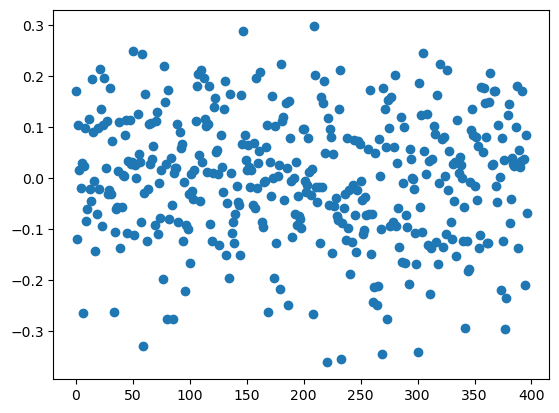

In [127]:
# Plot
plt.scatter(range(len(X_treino_clean)), residuals);

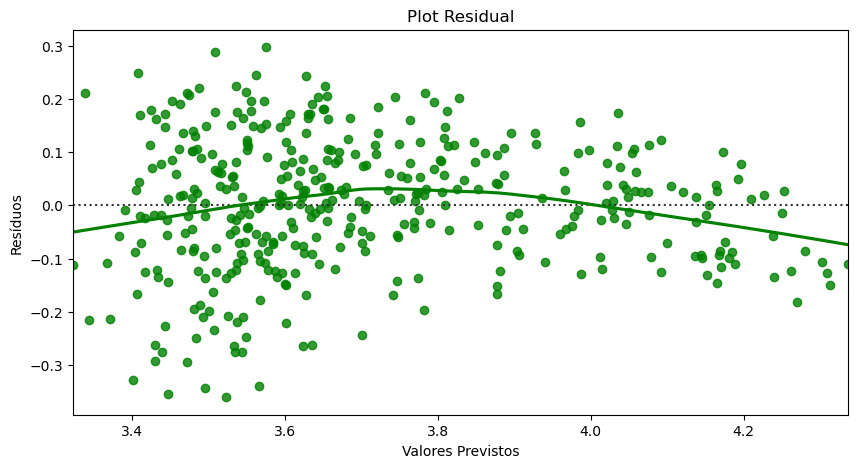

In [128]:
# Valores previstos
valores_previstos = modelo_v4.fittedvalues

# Plot
plt.figure(figsize = (10,5))
sns.residplot(x = valores_previstos, y = residuals, color = "green", lowess = True)
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.title("Plot Residual")
plt.show()

**Análise:**

- A média dos resíduos é muito próxima de 0, portanto, a suposição para os resíduos é satisfeita. Os resíduos são plotados aleatoriamente em torno de 0.
- Os resíduos "saltam aleatoriamente" em torno da linha 0. Isso sugere que não há autocorrelação.
- Os resíduos formam aproximadamente uma "faixa horizontal" em torno da linha 0. Isso sugere que as variâncias dos termos de erro são iguais.
- Nenhum resíduo "se destaca" do padrão aleatório básico de resíduos. Isso sugere que não há outliers.

No entanto, confiar apenas no gráfico pode não ser suficiente. Diferentes pessoas podem interpretar o gráfico de maneiras diferentes. Para ter certeza, será aplicado um teste estatístico: o teste de Durbin-Watson, que verifica a independência dos erros em um modelo de regressão linear.

O Teste de Durbin-Watson é uma ferramenta estatística usada para avaliar se a premissa de independência dos erros em um modelo de regressão linear é atendida. 

O resultado é um valor que varia de 0 a 4. Valores próximos a 0 sugerem a presença de autocorrelação positiva nos erros, enquanto valores próximos a 4 indicam autocorrelação negativa. Valores em torno de 2 sugerem que não há autocorrelação nos erros.

In [129]:
# Vamos construir uma função para automatizar a validação da suposição 2.

# Função
def valida_sup_2(residuos):
    
    import statsmodels
    
    # Define o modelo
    resultado = statsmodels.stats.stattools.durbin_watson(residuos)
    
    print('Resultado do teste:', resultado)
    
    # Interprete o resultado
    if resultado < 1.9:
        print("Há evidências de autocorrelação positiva nos erros! Suposição não satisfeita!")
    elif resultado > 2.1:
        print("Há evidências de autocorrelação negativa nos erros! Suposição não satisfeita!")
    else:
        print("Não há evidências de autocorrelação nos erros! Suposição satisfeita!")

In [130]:
valida_sup_2(residuals)

Resultado do teste: 2.0528685239170477
Não há evidências de autocorrelação nos erros! Suposição satisfeita!


### 3- Homocedasticidade

A homocedasticidade refere-se à condição em que a variabilidade dos erros permanece constante em todos os níveis das variáveis independentes. Isso significa que a dispersão dos dados é uniforme em relação a uma variável específica. Em contraste, a heterocedasticidade ocorre quando essa variabilidade varia entre diferentes níveis da variável, indicando uma inconsistência na dispersão dos dados.

A importância da homocedasticidade em análises estatísticas reside no fato de que muitos testes estatísticos assumem essa condição para fornecer resultados precisos. A ausência de homocedasticidade pode levar a conclusões incorretas.

Para verificar a homocedasticidade, será aplicado o **Teste de Goldfeld-Quandt** com um nível de significância de 0,05.

* Hipótese nula (H0): Existe evidência de heterocedasticidade (a regressão não é homocedástica).
* Hipótese alternativa (H1): Não há evidência de heterocedasticidade (a regressão é provavelmente homocédástica).

O Teste de Goldfeld-Quandt divide os dados em dois grupos e compara a variabilidade dos resíduos entre eles. Se os resíduos dos dois grupos mostrarem variações semelhantes, a regressão é considerada homocedástica. Se houver diferenças significativas nas variações dos resíduos, a regressão é heterocedástica.


Na interpretação do teste, compare o valor-p obtido com o nível de significância:

* Se o valor-p for inferior a 0,05: Rejeita-se a H0, indicando que há evidências de heterocedasticidade e a regressão não é homocedástica.

* Se o valor-p for superior a 0,05: Não se rejeita a H0, sugerindo que a regressão pode ser homocedástica.


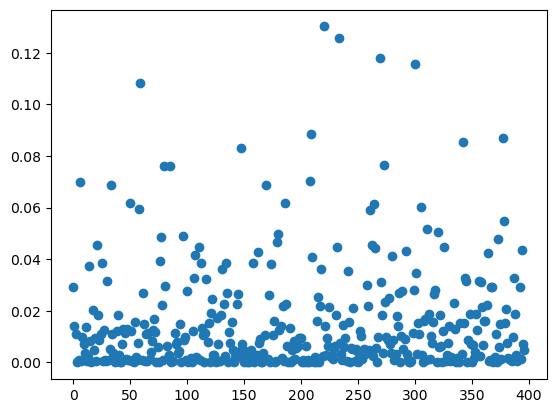

In [131]:
# Resíduos
residuals = modelo_v4.resid

# Plot
plt.scatter(range(len(X_treino_clean)),np.square(residuals));

Como o gráfico não apresenta padrão, podemos concluir que não há heterocedasticidade. Mas vamos aplicar um teste estatístico.

In [132]:
# Função
def valida_sup_3(y, x):
    
    # Estatísticas
    estatisticas = ["F statistic", "p-value"]
    
    # Teste
    teste_goldfeldquandt = sms.het_goldfeldquandt(y, x)
    
    resultado = lzip(estatisticas, teste_goldfeldquandt)
    
    pval = resultado[1][1]
    
    if pval < 0.05:
        print(
            "Há evidências de heterocedasticidade (a regressão não é homocedástica)"
            "e rejeitamos a H0. Suposição não satisfeita!")
    else:
        print(
            "Não há evidências de heterocedasticidade (a regressão é provavelmente homocedástica)."
            "Falhamos em rejeitar a H0. Suposição satisfeita!")

In [133]:
# Aplica a função
valida_sup_3(y_treino, X_treino_clean)

Não há evidências de heterocedasticidade (a regressão é provavelmente homocedástica).Falhamos em rejeitar a H0. Suposição satisfeita!


Análise:

Não há evidências de heterocedasticidade (a regressão é provavelmente homocedástica). Falhamos em rejeitar a H0. Suposição satisfeita!

### 4- Normalização dos Erros

Normalidade dos termos de erro. Os resíduos devem ser normalmente distribuídos.

Essa suposição pode ser melhor verificada com um histograma ou um Q-Q-Plot.

Na regressão linear, a suposição de normalização dos resíduos é a suposição de que os resíduos (erros) da regressão seguem uma distribuição normal. Isso significa que os resíduos devem ter uma média zero e uma variância constante.

Essa suposição é importante porque alguns testes estatísticos e métodos de estimação de parâmetros pressupõem que os resíduos seguem uma distribuição normal. Se os resíduos não seguirem uma distribuição normal, os resultados desses testes e métodos podem ser imprecisos ou enganosos.

Para verificar se os resíduos seguem uma distribuição normal, você pode plotar um gráfico de resíduos e observar se os resíduos seguem uma distribuição normal. Você também pode usar um teste de normalidade, como o Teste de Shapiro-Wilk, para verificar se os resíduos seguem uma distribuição normal. Se os resíduos não seguirem uma distribuição normal, você pode tentar transformar os dados ou usar um modelo de regressão diferente.

In [134]:
residuals = modelo_v4.resid

<Axes: ylabel='Count'>

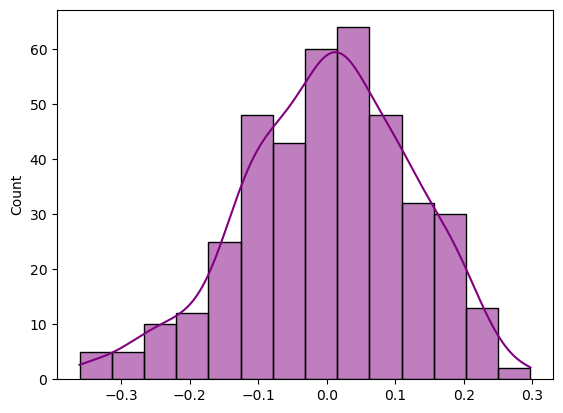

In [135]:
# Histograma dos resíduos
sns.histplot(residuals, kde = True, color = 'purple')

Vamos criar um QQ Plot.

Um gráfico qq (quantile-quantile) é um gráfico que é usado para comparar duas distribuições de dados. Ele é chamado de "qq" porque ele compara os quantis das duas distribuições. Os quantis são os valores que dividem os dados em partes iguais. Por exemplo, o primeiro quartil é o valor que divide os dados em um quarto menor e três quartos maiores.

Para interpretar um gráfico qq, você deve observar se os pontos seguem uma linha diagonal. Se os pontos seguirem uma linha diagonal, isso indica que as duas distribuições são similares. Se os pontos não seguirem uma linha diagonal, isso indica que as duas distribuições são diferentes.

Um gráfico qq é útil para verificar se os dados seguem uma distribuição específica, como a distribuição normal. Se os dados seguirem uma distribuição normal, os pontos no gráfico qq devem seguir uma linha diagonal. Se os pontos não seguirem uma linha diagonal, isso pode indicar que os dados não seguem uma distribuição normal.

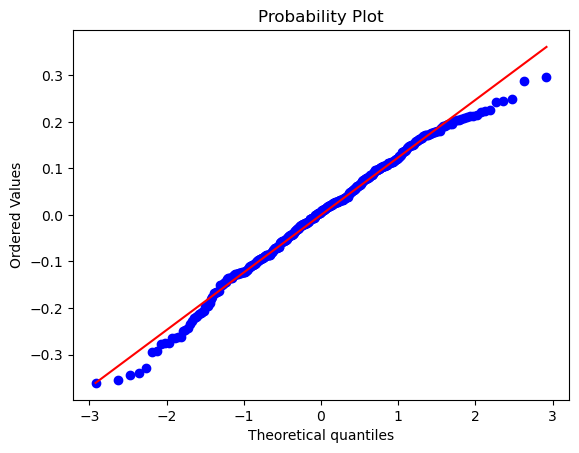

In [136]:
# QQ Plot
stats.probplot(residuals, dist = "norm", plot = pylab)
plt.show()

Análise:

Os resíduos seguem praticamente uma distribuição normal. A suposição estaria satisfeita. Vamos aplicar o Teste de Shapiro-Wilk aos resíduos para confirmar.

Para interpretar o resultado do teste, você pode comparar o valor-p com um nível de significância pré-determinado (por exemplo, 0,05).

Se o valor-p for menor que o nível de significância, rejeitamos a H0. Isso indica que há evidências de que os resíduos não seguem uma distribuição normal.

Se o valor-p for maior que o nível de significância, falhamos em rejeitar a H0. Isso indica que os resíduos seguem uma distribuição normal.

In [137]:
# Função
def valida_sup_4(residuos):
    
    from scipy.stats import shapiro
    
    # Aplica o teste
    resultado = shapiro(residuos)
    
    # Extrai o valor-p
    pval = resultado.pvalue
    
    print('Valor-p =', pval)
    
    if pval < 0.05:
        print(
        "Rejeitamos a H0."
        "Isso indica que há evidências de que os resíduos não seguem uma distribuição normal!")
    else:
        print(
        "Falhamos em rejeitar a H0."
        "Isso indica que os resíduos seguem uma distribuição normal. Suposição satisfeita!")

In [138]:
valida_sup_4(residuals)

Valor-p = 0.009239116683602333
Rejeitamos a H0.Isso indica que há evidências de que os resíduos não seguem uma distribuição normal!


**Análise:**

Os resíduos não passaram no teste de normalidade. Provavelmente a diferença é pouca, mas essa suposição não foi satisfeita.

Notas:

1- Nem a variável dependente nem a variável independente precisam ser normalmente distribuídas. Na verdade, elas podem ter todos os tipos de distribuições. A suposição de normalidade se aplica à distribuição dos erros.

2- Às vezes, a não normalidade dos resíduos indica a presença de outliers. Se for esse o caso, lide com os valores discrepantes primeiro.

3- Talvez usar algumas transformações resolva o problema, porém, tem consequências. Como a interpretação dos coeficientes muda se transformarmos variáveis.

4- Eu não diria que esse modelo linear é completamente inútil. No entanto, isso significa que o modelo não explica corretamente/completamente os dados. Há uma parte em que você precisa decidir se o modelo é "bom o suficiente" ou não.

5- Modelos com superajustes (overfitting), podem apresentar resíduos não normais.

O ideal é retornar e trabalhar mais nos dados e/ou no modelo e checar novamente as suposições, mas este artigo abaixo traz uma discussão interessante sobre o tema e afirma que o teste t e a regressão linear de mínimos quadrados não requerem nenhuma suposição de distribuição Normal em amostras suficientemente grandes (Big Data).

https://www.annualreviews.org/doi/full/10.1146/annurev.publhealth.23.100901.140546

### Multicolinearidade

In [139]:
# Função para checar o VIF de todas as variáveis
def valida_sup_5(train):
    
    # Cria o dataframe
    vif = pd.DataFrame()
    
    # Alimenta cada coluna
    vif["feature"] = train.columns

    # Calcula VIF para cada variável
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    
    return vif

In [140]:
print(valida_sup_5(df_X_treino))

                     feature  VIF
0   tempo_medio_carregamento 3.69
1  percentual_falhas_entrega 3.83
2         satisfacao_cliente 4.31
3       tempo_medio_descarga 4.23
4  percentual_entregas_danos 1.73


**Análise:**

Não há multicolinearidade nos dados. Suposição satisfeita.

## Conclusão

Nosso modelo atendeu praticamente a todas as suposições. O ideal seria retornar e tentar ajustar o modelo até satisfazer plenamente a todas as suposições ou considerar se o modelo é bom o suficiente. 

Vamos considerar o modelo bom o suficiente para o nosso propósito pois os gráficos mostraram que estamos muito próximos da normalidade dos resíduos.

Vamos interpretar os resultados e entregar nossas conclusões.

In [141]:
# Coeficientes (o que o modelo aprendeu)
modelo_v4.params

const    3.71
x1      -0.11
x2       0.02
x3      -0.02
x4      -0.11
dtype: float64

In [142]:
# Vamos criar um dataframe com os coeficientes
df = pd.DataFrame(modelo_v4.params)

In [143]:
df

,0
const,3.71
x1,-0.11
x2,0.02
x3,-0.02
x4,-0.11


In [144]:
# Lista de colunas com os nomes das variáveis
colunas = ['tempo_medio_carregamento',
           'satisfacao_cliente',
           'tempo_medio_descarga', 
           'percentual_falhas_entrega',
           'percentual_entregas_danos']

In [145]:
# Pivot da tabela
df_final = pd.pivot_table(df, columns = colunas).reset_index()

In [146]:
df_final

,index,percentual_entregas_danos,percentual_falhas_entrega,satisfacao_cliente,tempo_medio_carregamento,tempo_medio_descarga
0,0,-0.11,-0.02,-0.11,3.71,0.02


## Interpretação de cada coeficiente:

**percentual_entregas_danos (-0.11):** Para cada aumento de uma unidade no percentual de entregas com danos, espera-se que a variável dependente diminua em 0,11 unidades. Isso indica uma relação negativa entre o percentual de entregas com danos e a variável dependente
<br>

**percentual_falhas_entrega (-0.02):** Para cada aumento de uma unidade no percentual de falhas de entrega, espera-se que a variável dependente diminua em 0,02 unidades. Isso indica uma relação negativa entre o percentual de falhas de entrega e a variável dependente.
<br>

**satisfacao_cliente (-0.11):** Para cada aumento de uma unidade no percentual de satisfação do cliente, espera-se que a variável dependente diminua em 0,11 unidades. Isso indica uma relação negativa entre a satisfação do cliente e a variável dependente.
<br>

**tempo_medio_carregamento (3.71):** Um aumento de uma unidade no tempo médio de carregamento está associado a um aumento de 3,71 unidades na variável dependente. Isso indica uma relação positiva entre o tempo médio de carregamento e a variável dependente.
<br>

**tempo_medio_descarga (0.02):** Um aumento de uma unidade no tempo médio de carregamento está associado a um aumento de 0,02 unidades na variável dependente. Isso indica uma relação positiva entre o tempo médio de descarga e a variável dependente.

Cada coeficiente oferece insights sobre como as variáveis independentes influenciam a variável dependente. No entanto, é importante também considerar a significância estatística de cada coeficiente para determinar se as relações observadas são estatisticamente significativas.

### Variáveis Mais Relevantes

In [147]:
# Sumário
modelo_v4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     percentual_entregas_no_prazo_log   R-squared:                       0.785
Model:                                          OLS   Adj. R-squared:                  0.783
Method:                               Least Squares   F-statistic:                     358.4
Date:                              Tue, 23 Jul 2024   Prob (F-statistic):          1.75e-129
Time:                                      11:47:31   Log-Likelihood:                 267.35
No. Observations:                               397   AIC:                            -524.7
Df Residuals:                                   392   BIC:                            -504.8
Df Model:                                         4                                         
Covariance Type:                          nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7064      0.006    594.696      0.000       3.694       3.719
x1            -0.1133      0.012     -9.400      0.000      -0.137      -0.090
x2             0.0247      0.012      2.026      0.043       0.001       0.049
x3            -0.0238      0.012     -1.994      0.047      -0.047      -0.000
x4            -0.1072      0.008    -13.098      0.000      -0.123      -0.091
==============================================================================
Omnibus:                        6.666   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.788
Skew:                          -0.319   Prob(JB):                       0.0336
Kurtosis:                       2.938   Cond. No.                         4.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Respondendo a Pergunta de Negócio:



Com base nos critérios acima, podemos determinar que as variáveis (x1 a x4) são relevantes para o modelo. Essas variáveis têm a maior influência sobre o percentual de entregas no prazo (percentual_entregas_no_prazo). Essas variaveis correspondem a:

* tempo_medio_carregamento
* percentual_falhas_entrega
* satisfacao_cliente
* tempo_medio_descarga
* percentual_entregas_danos

In [148]:
%reload_ext watermark
%watermark -a "Marcus Lopes"

Author: Marcus Lopes



## FIM